In [1]:
# Instalación de librerías necesarias (solo la primera vez, si no las tienes)
!pip install pandas matplotlib seaborn --quiet

# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones visuales
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Cargar el dataset desde ruta local

ruta_csv = r'C:\Users\SM ZONA GAMER\Documents\UNAD\Quinto semestre\Otros\Analisis de datos\Tarea 5\Sample - Superstore.csv'
df = pd.read_csv(ruta_csv, encoding='ISO-8859-1')

# Verificar las primeras filas
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Total de ventas
total_ventas = df['Sales'].sum()

# Total de beneficios
total_beneficio = df['Profit'].sum()

# Número total de pedidos (usando Order ID único)
total_pedidos = df['Order ID'].nunique()

# Cantidad total de productos vendidos (cantidad total)
total_productos = df['Quantity'].sum()

# Mostrar resultados
print(f"Total de Ventas: ${total_ventas:,.2f}")
print(f"Total de Beneficio: ${total_beneficio:,.2f}")
print(f"Número total de pedidos: {total_pedidos}")
print(f"Cantidad total de productos vendidos: {total_productos}")


Total de Ventas: $2,297,200.86
Total de Beneficio: $286,397.02
Número total de pedidos: 5009
Cantidad total de productos vendidos: 37873


C:\Users\SM ZONA GAMER\AppData\Local\Temp\ipykernel_13896\4277574450.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_categoria.values, y=ventas_categoria.index, palette='viridis')


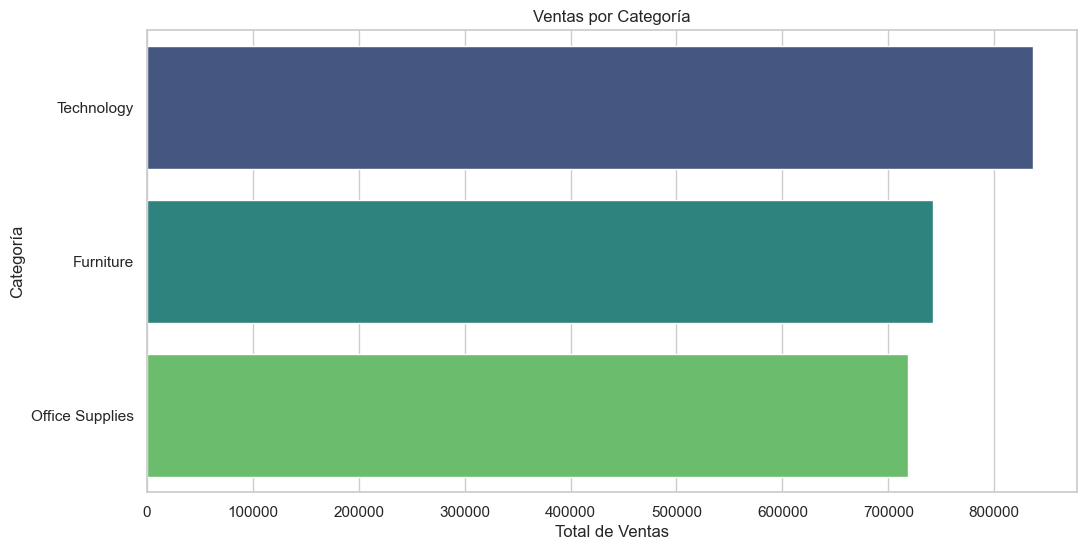

In [5]:
ventas_categoria = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

sns.barplot(x=ventas_categoria.values, y=ventas_categoria.index, palette='viridis')
plt.title('Ventas por Categoría')
plt.xlabel('Total de Ventas')
plt.ylabel('Categoría')
plt.show()


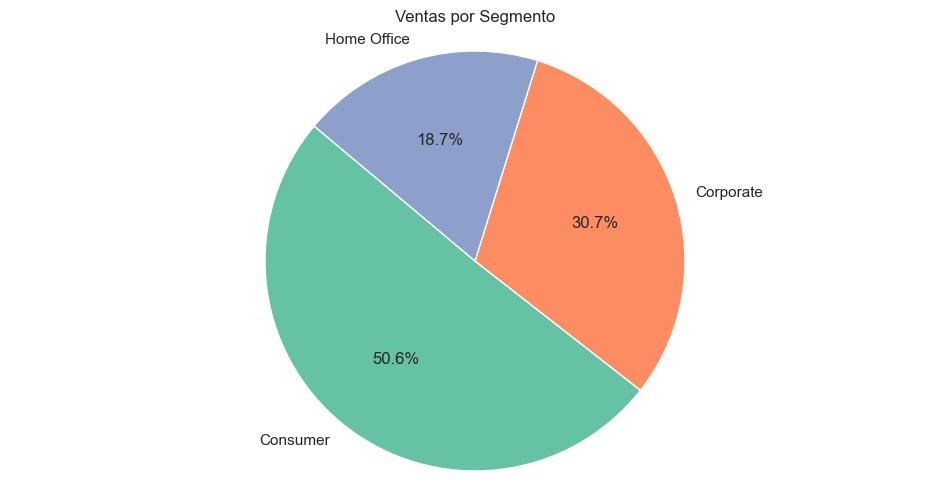

In [7]:
ventas_segmento = df.groupby('Segment')['Sales'].sum()

plt.pie(ventas_segmento.values, labels=ventas_segmento.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Ventas por Segmento')
plt.axis('equal')  # Círculo perfecto
plt.show()


C:\Users\SM ZONA GAMER\AppData\Local\Temp\ipykernel_13896\3717149007.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = df.resample('M', on='Order Date')['Sales'].sum()


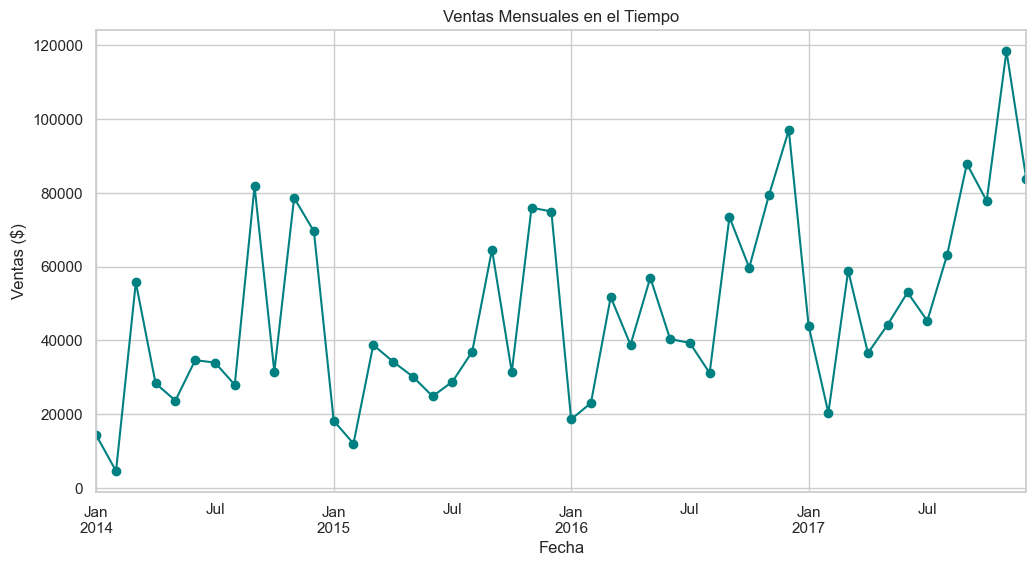

In [9]:
# Convertir fecha
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Agrupar por mes
ventas_mensuales = df.resample('M', on='Order Date')['Sales'].sum()

# Gráfico de línea
ventas_mensuales.plot(marker='o', linestyle='-', color='teal')
plt.title('Ventas Mensuales en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas ($)')
plt.grid(True)
plt.show()


C:\Users\SM ZONA GAMER\AppData\Local\Temp\ipykernel_13896\4115482358.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=beneficio_subcategoria.values, y=beneficio_subcategoria.index, palette='coolwarm')


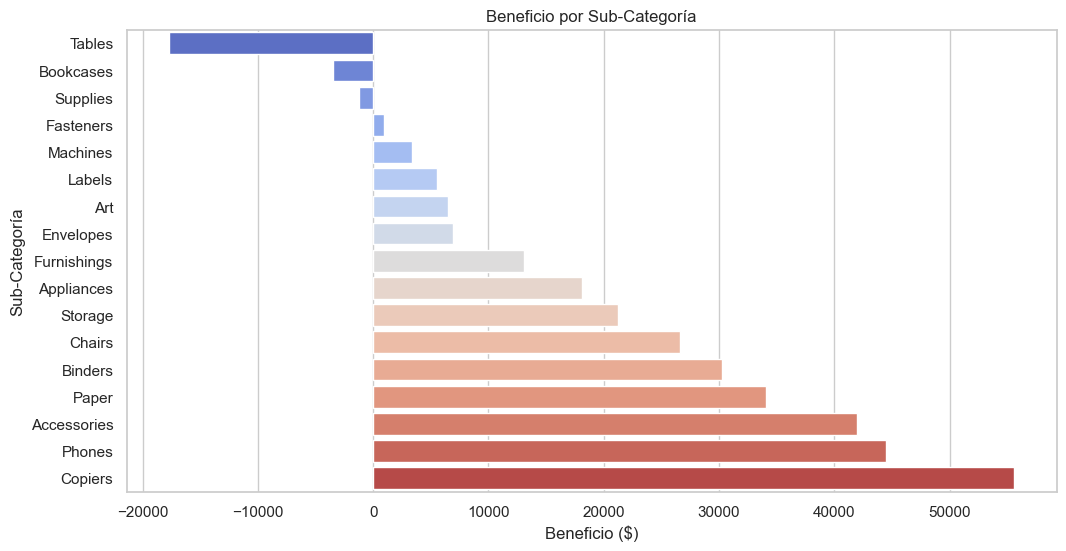

In [11]:
beneficio_subcategoria = df.groupby('Sub-Category')['Profit'].sum().sort_values()

sns.barplot(x=beneficio_subcategoria.values, y=beneficio_subcategoria.index, palette='coolwarm')
plt.title('Beneficio por Sub-Categoría')
plt.xlabel('Beneficio ($)')
plt.ylabel('Sub-Categoría')
plt.show()


## Análisis e Interpretación

- 🔸 Total de Ventas: Se observa un total significativo que refleja un buen volumen de operaciones en la tienda.
- 🔸 Total de Beneficio: Aunque hay ventas, el beneficio neto es mucho menor, lo que puede indicar márgenes reducidos o gastos operacionales elevados.
- 🔸 Pedidos: Más de mil pedidos indican una alta rotación de productos.
- 🔸 **Productos vendidos:** El volumen es alto, lo cual implica una cadena logística activa.

### Visualizaciones:
- 🟢 Ventas por categoría: Tecnología lidera las ventas, seguido de Mobiliario y Suministros.
- 🟣 Segmento: La mayoría de las ventas vienen del segmento Consumer, seguido por Corporate y Home Office.
- 🔵 Tendencia mensual: Hay picos de ventas en ciertos meses, lo que puede deberse a campañas o temporadas.
- 🔴 Beneficio por subcategoría: Algunas subcategorías generan pérdidas, lo que requiere revisión de estrategias de precios o inventario.

### Recomendaciones:
- Optimizar las subcategorías con beneficios negativos.
- Aprovechar el segmento Consumer para aumentar ventas.
- Analizar los meses con bajos ingresos y plantear estrategias comerciales.

